<a href="https://colab.research.google.com/github/Nico-Araujo/FarmTech/blob/main/notebooks/NicolasAntonioSilvaAraujo_rm566307_pbl_fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalando as bibliotecas necessárias
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [ ]:
# %% [markdown]
# # 🚜 FarmTech Solutions - Previsão de Rendimento Agrícola
# ## Fase 5 - Machine Learning e Computação em Nuvem

# Grupo:
# Integrantes: Juliano Romeiro, Nicolas Araujo, Vitória Bagatin
# Data: 04/09/2025

# %%
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
import os
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

print("Bibliotecas importadas com sucesso!")

# %%
# Carregamento dos dados
from google.colab import files
uploaded = files.upload()

# %%
# Verificar se o arquivo foi carregado
import io
df = pd.read_csv(io.BytesIO(uploaded['crop_yield.csv']))
print("Dados carregados com sucesso!")
print(f"Dimensões do dataset: {df.shape}")
print(f"Colunas disponíveis: {list(df.columns)}")

# %%
# Visualização inicial dos dados
print("Primeiras 5 linhas do dataset:")
display(df.head())

print("\nInformações do dataset:")
df.info()

print("\nEstatísticas descritivas:")
df.describe()

# %%
# Verificar valores missing
print("Valores faltando por coluna:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

if missing_data.sum() == 0:
    print("Não há valores faltando no dataset!")
else:
    print("Existem valores faltando que precisam ser tratados")

# %%
# Verificar duplicatas
duplicatas = df.duplicated().sum()
print(f"🔍 Número de linhas duplicadas: {duplicatas}")

if duplicatas > 0:
    print("Removendo duplicatas...")
    df = df.drop_duplicates()
    print(f"Duplicatas removidas. Novo shape: {df.shape}")
else:
    print("Não há duplicatas no dataset!")

# %%
# Salvar versão inicial limpa
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
df.to_csv(f'{output_dir}/crop_yield_cleaned.csv', index=False)
print("Dataset limpo salvo com sucesso!")

Bibliotecas importadas com sucesso!


Saving crop_yield.csv to crop_yield.csv
Dados carregados com sucesso!
Dimensões do dataset: (156, 6)
Colunas disponíveis: ['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
Primeiras 5 linhas do dataset:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB

Estatísticas descritivas:
Valores faltando por coluna:
Series([], dtype: int64)
Não há valores faltando no dataset!
🔍 Número de linhas duplicadas: 0
Não há duplicatas no dataset!
Dataset limpo salvo com sucesso!


Nomes das colunas:
['Crop', 'Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura', 'Rendimento']
Variável target: Rendimento
Variável de cultura: Crop
Distribuição dos tipos de cultura:
Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

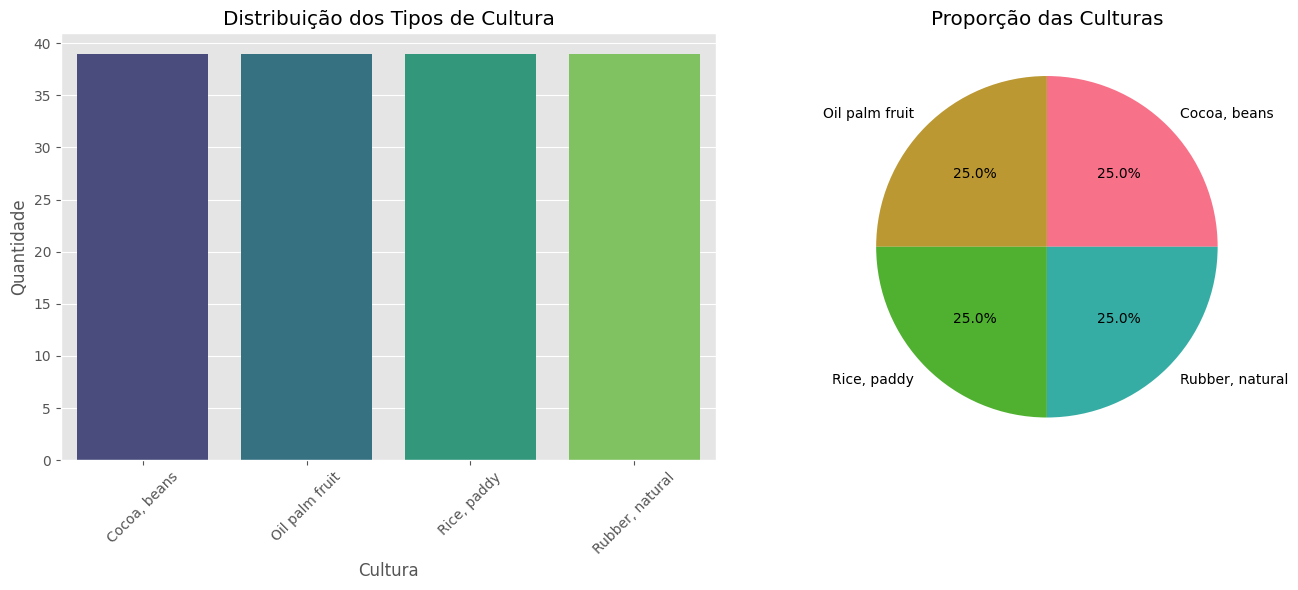

Variáveis numéricas identificadas:
['Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura']
Estatísticas descritivas das variáveis numéricas:


,Precipitacao,Umidade_Especifica,Umidade_Relativa,Temperatura
count,156.000000,156.000000,156.000000,156.00000
mean,2486.498974,18.203077,84.737692,26.18359
std,289.457914,0.293923,0.996226,0.26105
min,1934.620000,17.540000,82.110000,25.56000
25%,2302.990000,18.030000,84.120000,26.02000
50%,2424.550000,18.270000,84.850000,26.13000
75%,2718.080000,18.400000,85.510000,26.30000
max,3085.790000,18.700000,86.100000,26.81000


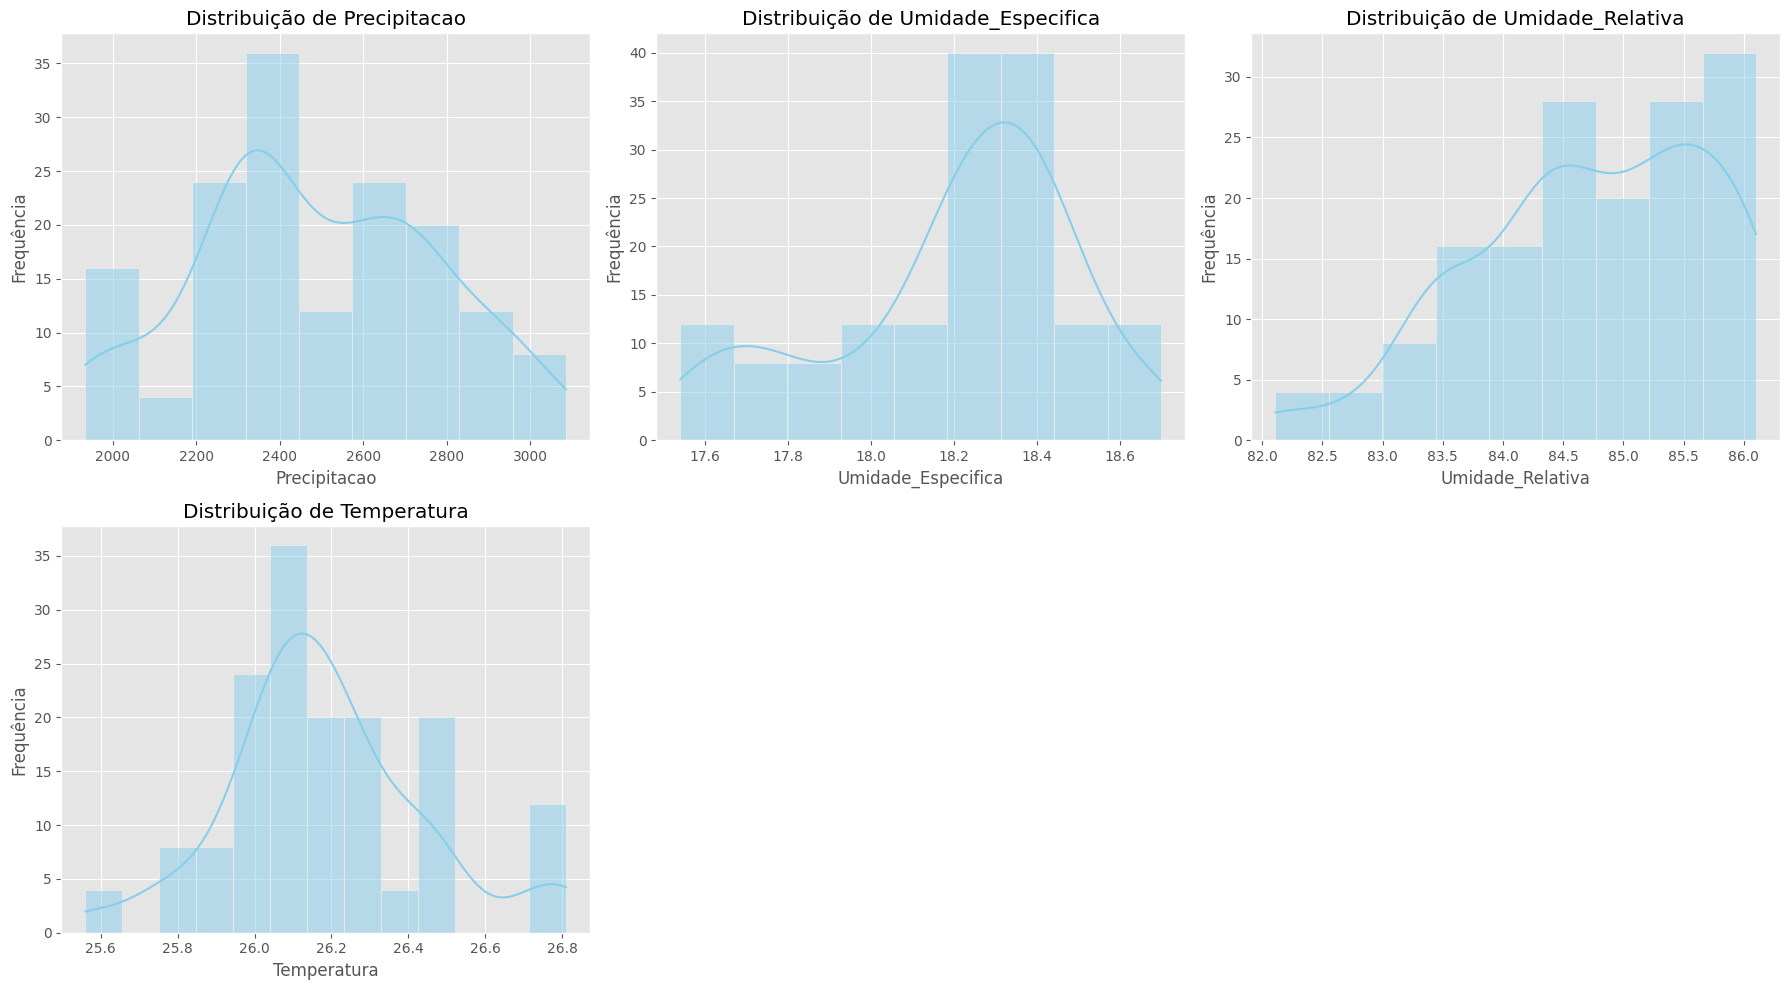

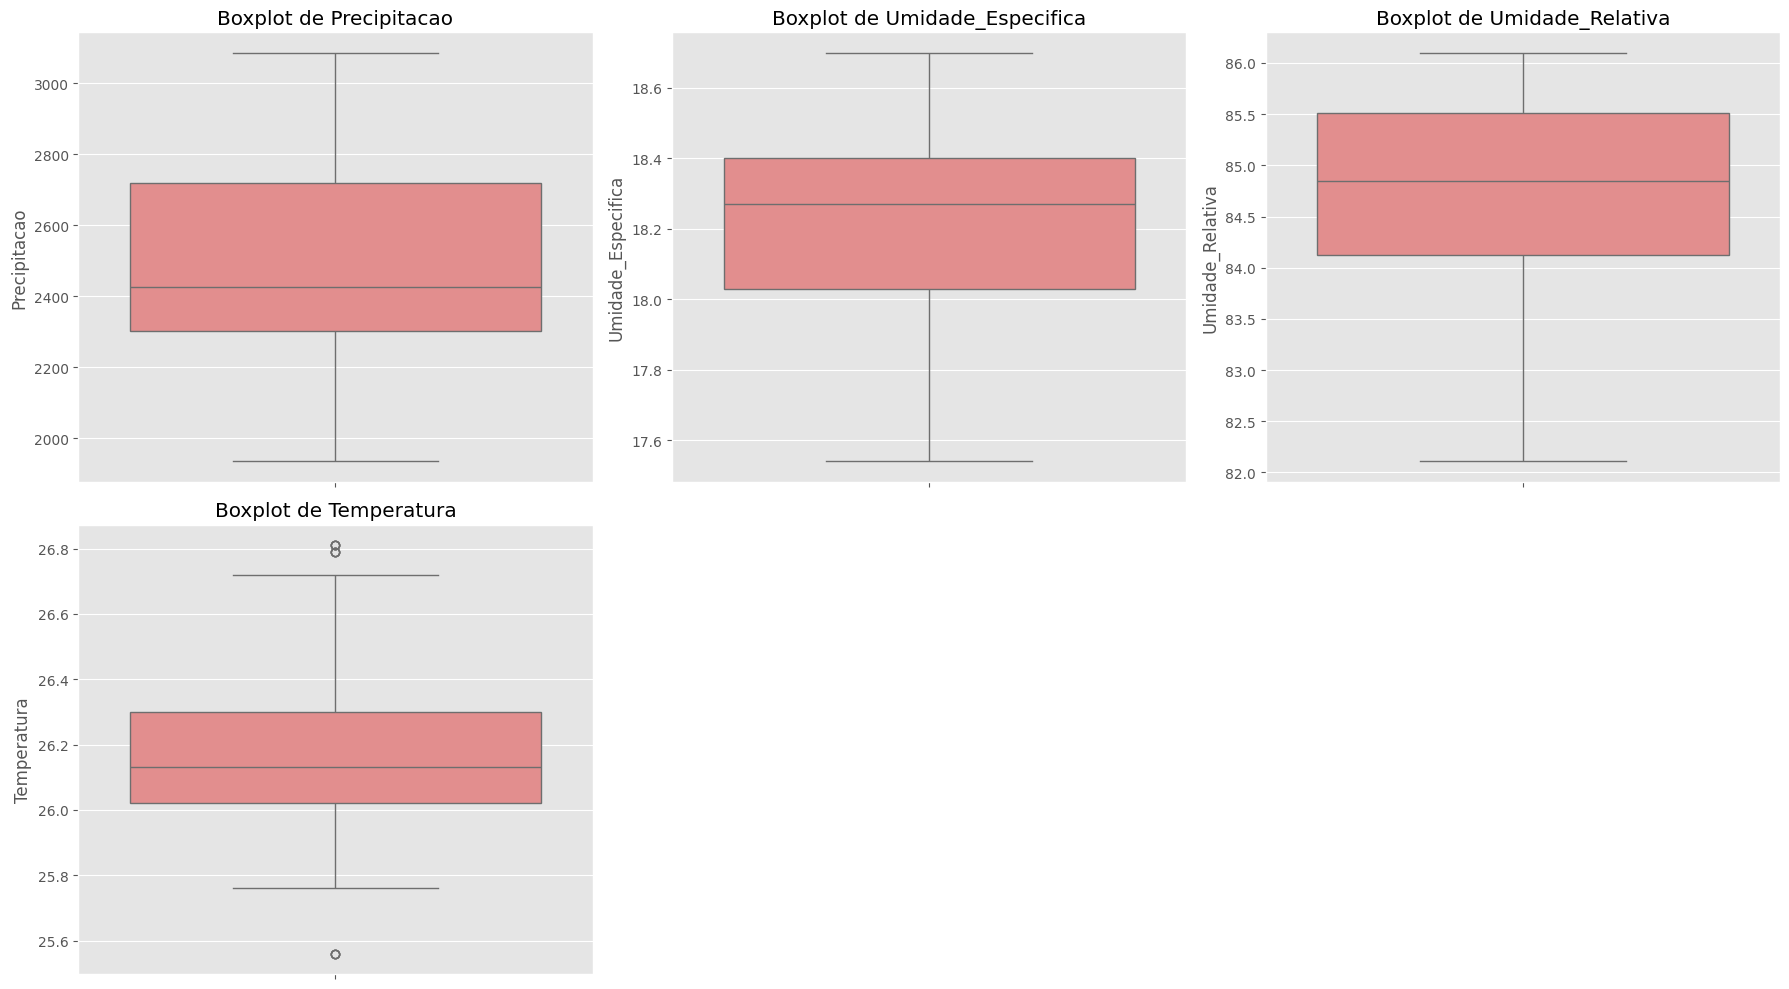

Matriz de correlação:


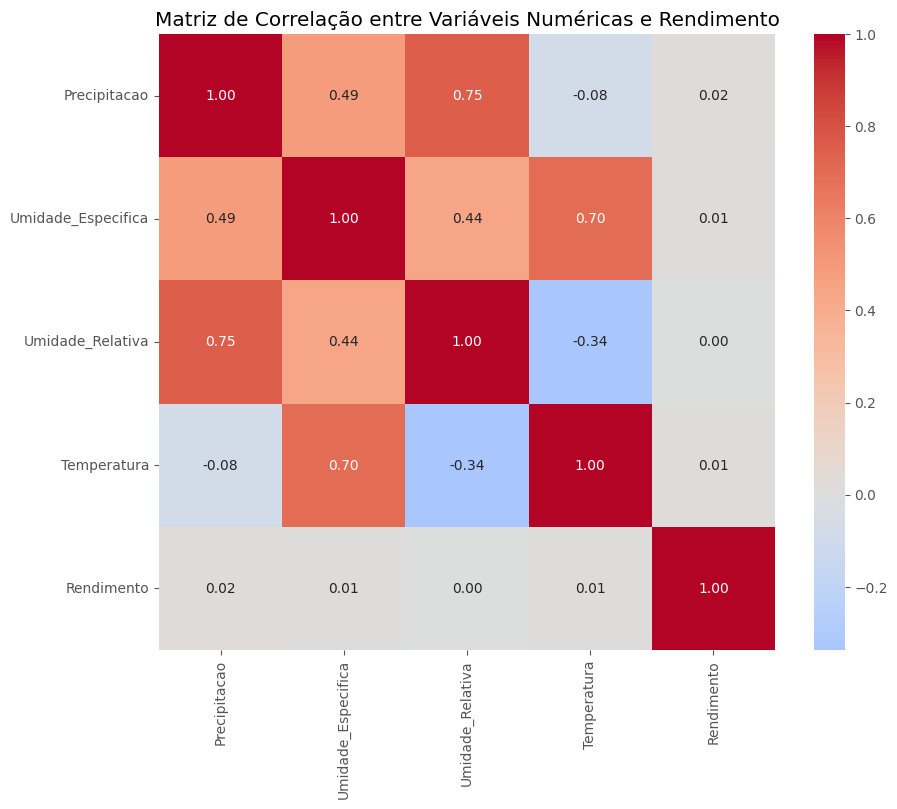

Correlação com Rendimento:
Rendimento            1.000000
Precipitacao          0.018830
Temperatura           0.013007
Umidade_Especifica    0.012651
Umidade_Relativa      0.000008
Name: Rendimento, dtype: float64


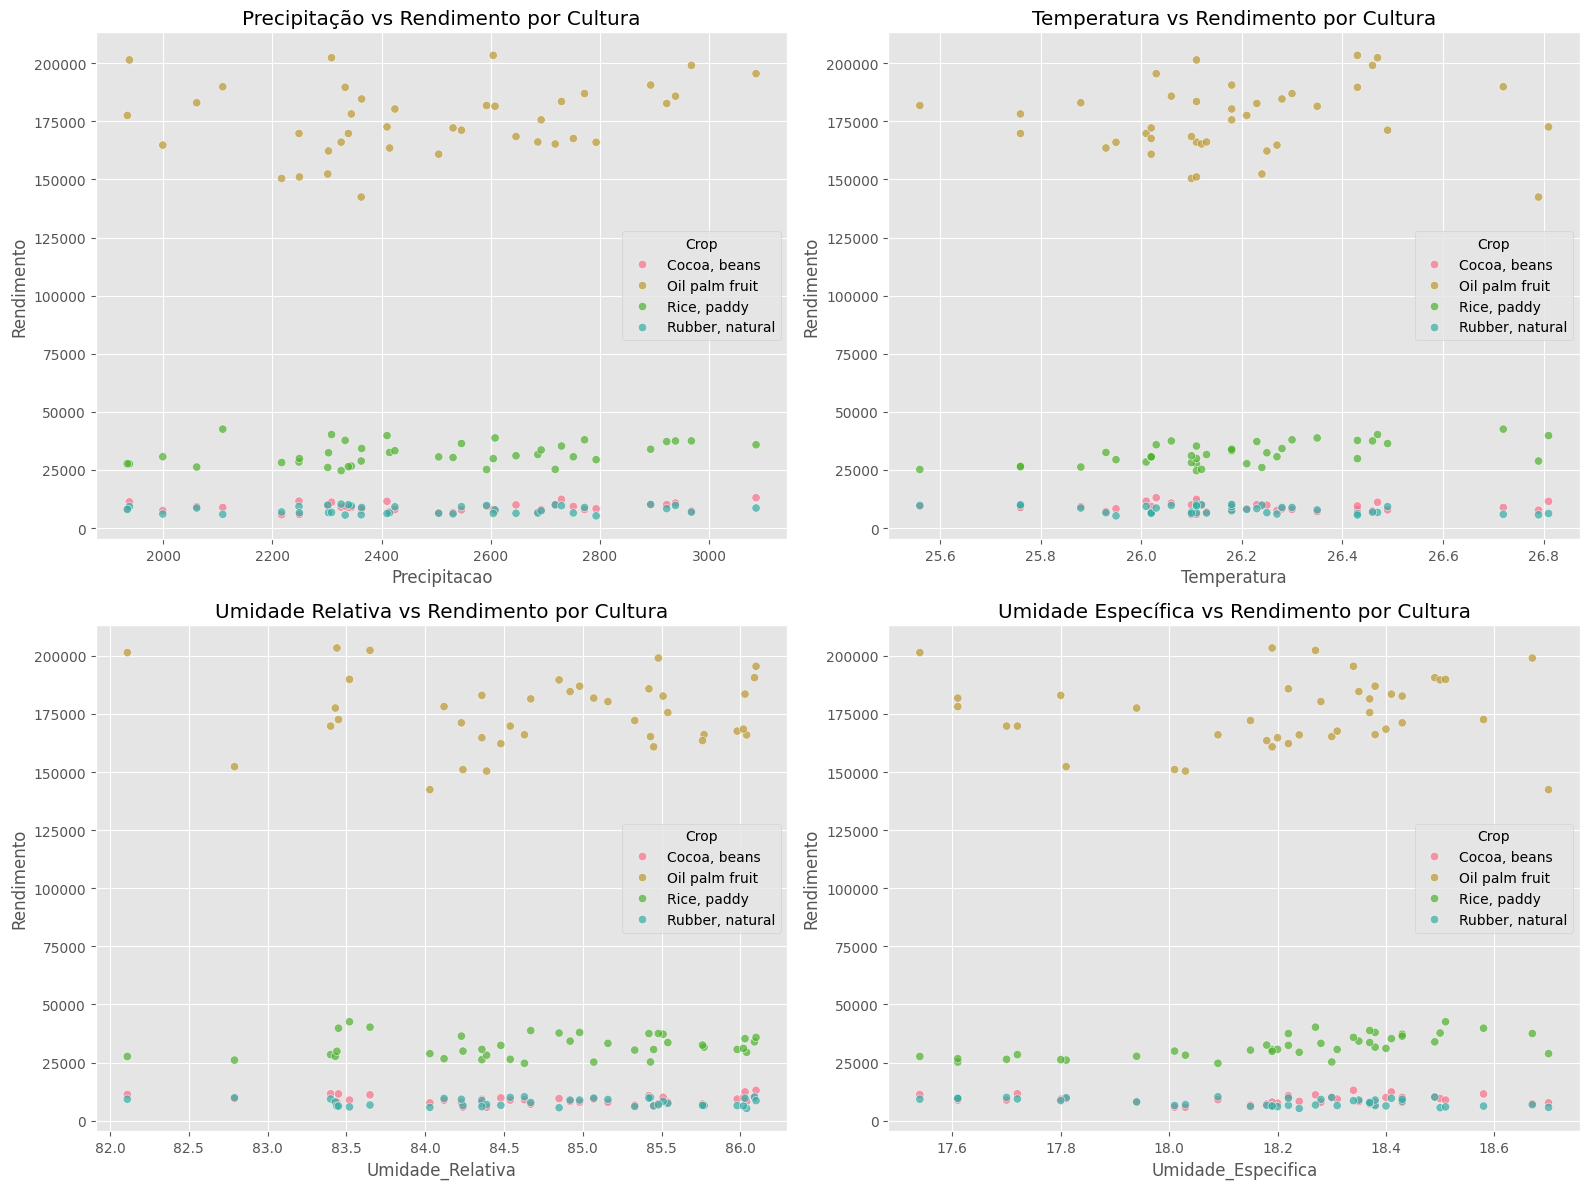

Estatísticas por tipo de cultura:


Precipitacao                              Umidade_Especifica  \
                        mean        std      min      max               mean   
Crop                                                                           
Cocoa, beans     2486.498974  292.30045  1934.62  3085.79          18.203077   
Oil palm fruit   2486.498974  292.30045  1934.62  3085.79          18.203077   
Rice, paddy      2486.498974  292.30045  1934.62  3085.79          18.203077   
Rubber, natural  2486.498974  292.30045  1934.62  3085.79          18.203077   

                                       Umidade_Relativa                   \
                      std    min   max             mean       std    min   
Crop                                                                       
Cocoa, beans     0.296809  17.54  18.7        84.737692  1.006009  82.11   
Oil palm fruit   0.296809  17.54  18.7        84.737692  1.006009  82.11   
Rice, paddy      0.296809  17.54  18.7        84.737692  1.006009  82.11   
Rubber, natural  0.296809  17.54  18.7        84.737692  1.006009  82.11   

                      Temperatura                             Rendimento  \
                  max        mean       std    min    max           mean   
Crop                                                                       
Cocoa, beans     86.1    26.18359  0.263613  25.56  26.81    8883.128205   
Oil palm fruit   86.1    26.18359  0.263613  25.56  26.81  175804.692308   
Rice, paddy      86.1    26.18359  0.263613  25.56  26.81   32099.666667   
Rubber, natural  86.1    26.18359  0.263613  25.56  26.81    7824.897436   

                                               
                          std     min     max  
Crop                                           
Cocoa, beans      1745.030586    5765   13056  
Oil palm fruit   14919.869752  142425  203399  
Rice, paddy       4789.948436   24686   42550  
Rubber, natural   1600.255042    5249   10285

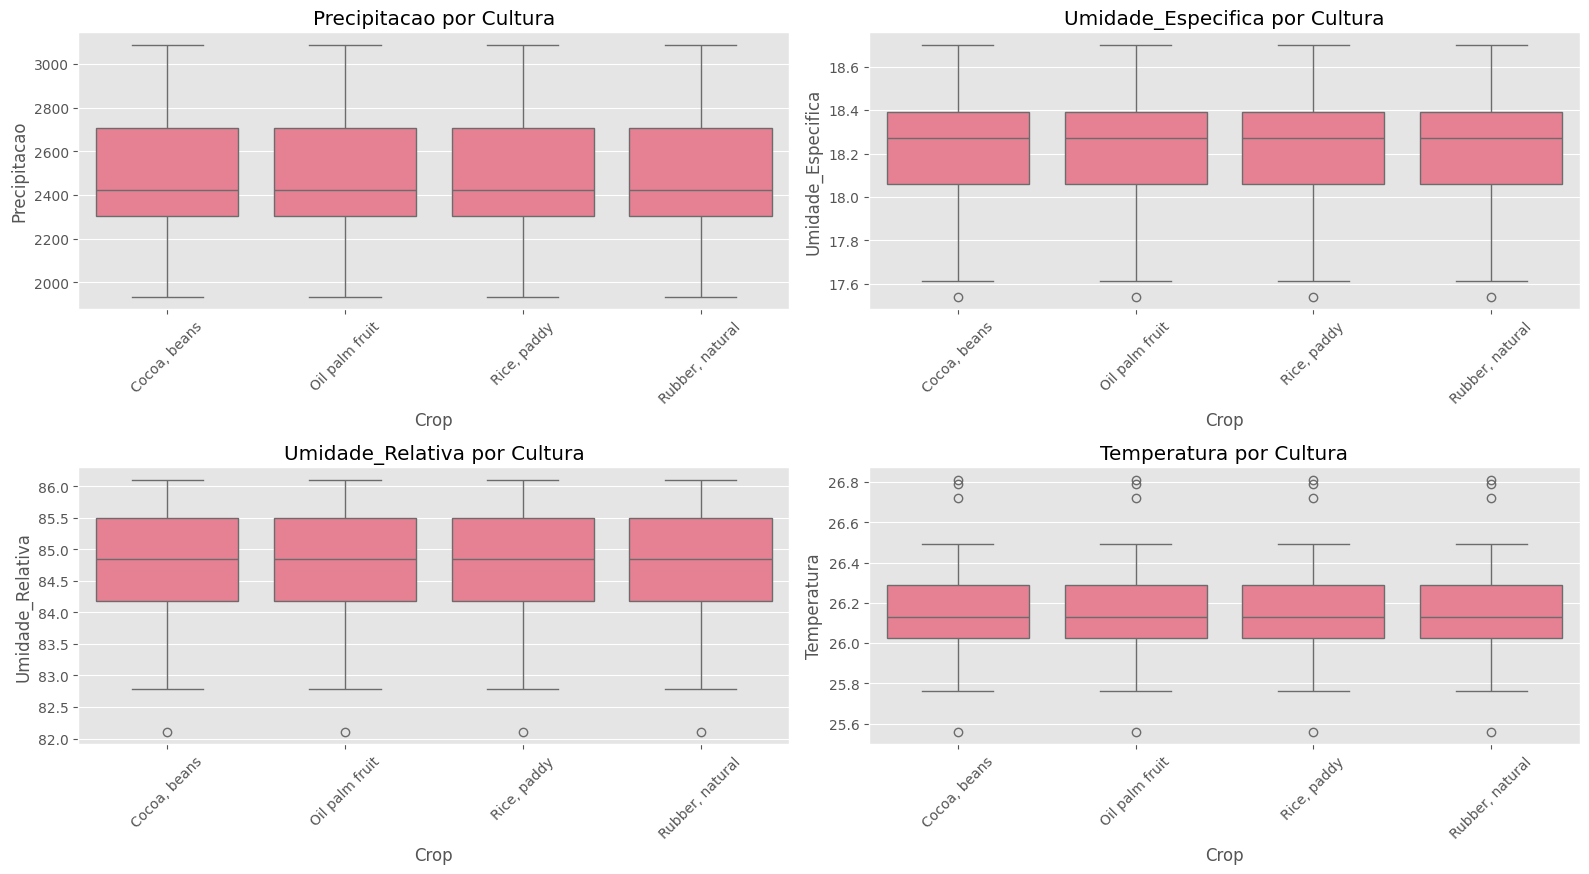

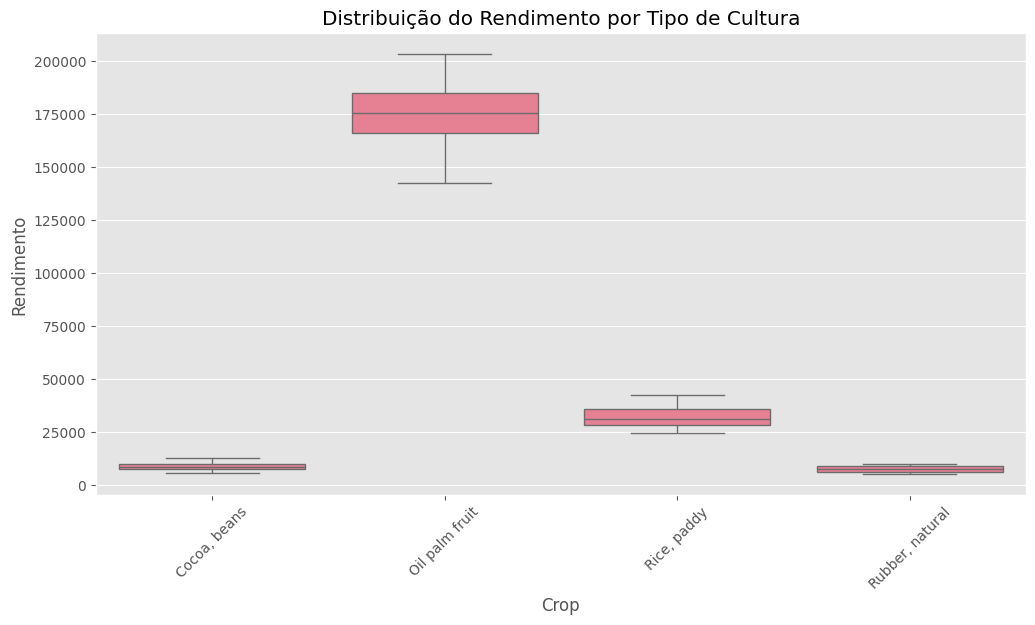

Identificação de possíveis outliers:
Número de outliers por variável (critério IQR):
Precipitacao           0
Umidade_Especifica     0
Umidade_Relativa       0
Temperatura           12
dtype: int64
Número de outliers detectados: 8


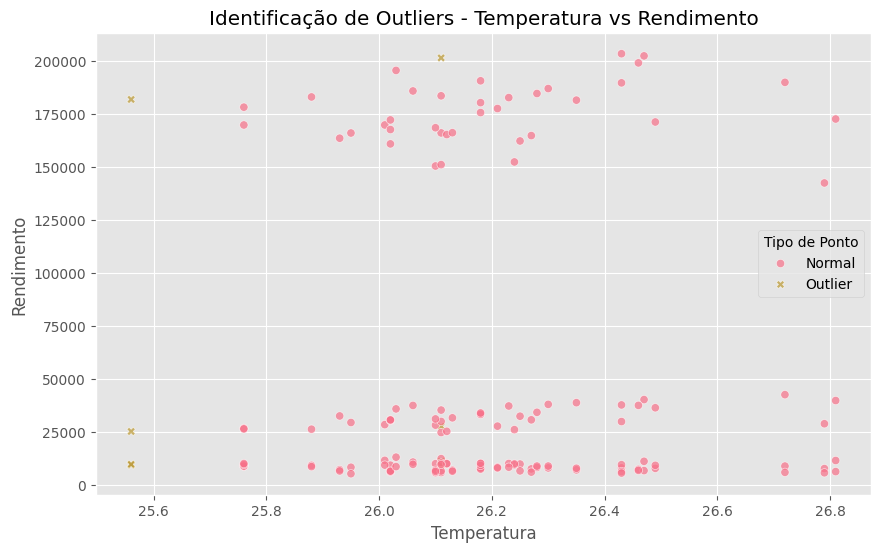

Insights principais:
- Variável mais correlacionada com rendimento: Precipitacao (0.019)
- Cultura com maior número de amostras: Cocoa, beans (39 amostras)
- Total de outliers detectados: 8
Dataset com outliers salvo com sucesso!
Análise exploratória concluída!


In [ ]:
# %% [markdown]
# ## 📈 Análise Exploratória de Dados Detalhada

# %%
# Verificando os nomes exatos das colunas para referência
print("Nomes das colunas:")
print(df.columns.tolist())

# %%
# Identificando a coluna de cultura and target
cultura_col = 'Crop' if 'Crop' in df.columns else 'Cultura'
target_col = 'Rendimento' if 'Rendimento' in df.columns else 'Yield'
print(f"Variável target: {target_col}")
print(f"Variável de cultura: {cultura_col}")


# Configurações iniciais para análise
plt.figure(figsize=(12, 8))
print("Distribuição dos tipos de cultura:")
cultura_counts = df[cultura_col].value_counts()
print(cultura_counts)

# %%
# Visualização da distribuição das culturas
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
# Updated to use the potentially renamed 'Crop' or 'Cultura' column
sns.countplot(data=df, x=cultura_col, palette='viridis')
plt.title('Distribuição dos Tipos de Cultura')
plt.xlabel('Cultura')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(cultura_counts.values, labels=cultura_counts.index, autopct='%1.1f%%')
plt.title('Proporção das Culturas')

plt.tight_layout()
plt.show()

# %%
# Definindo variáveis numéricas com base nos nomes das colunas
numeric_cols = []
for col in df.columns:
    # Updated to exclude both 'Crop' and 'Cultura'
    if col not in [cultura_col, target_col, 'Outlier'] and df[col].dtype in ['int64', 'float64']:
        numeric_cols.append(col)


print("Variáveis numéricas identificadas:")
print(numeric_cols)

# %%
# Análise das variáveis numéricas
print("Estatísticas descritivas das variáveis numéricas:")
display(df[numeric_cols].describe())

# %%
# Distribuição das variáveis numéricas
# Adjusted for potentially renamed columns
numeric_cols_for_plot = [col for col in numeric_cols if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_plot):
    if i < len(axes):  # Garantir que não ultrapasse o número de subplots
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribuição de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequência')

# Remover subplots extras se houver
for i in range(len(numeric_cols_for_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# %%
# Boxplots para identificar outliers
# Adjusted for potentially renamed columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_plot):
    if i < len(axes):  # Garantir que não ultrapasse o número de subplots
        sns.boxplot(y=df[col], ax=axes[i], color='lightcoral')
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_ylabel(col)

# Remover subplots extras se houver
for i in range(len(numeric_cols_for_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# %%
# Análise de correlação
print("Matriz de correlação:")
# Updated to use potentially renamed columns
correlation_matrix = df[numeric_cols + [target_col]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas e Rendimento')
plt.show()

# %%
# Correlação com a variável target (Rendimento)
rendimento_corr = correlation_matrix[target_col].sort_values(ascending=False)
print("Correlação com Rendimento:")
print(rendimento_corr)

# %%
# Relação entre variáveis e rendimento por tipo de cultura
plt.figure(figsize=(16, 12))

# Precipitação vs Rendimento
plt.subplot(2, 2, 1)
# Adjusted column names to match renamed columns
precip_col = 'Precipitacao'
sns.scatterplot(data=df, x=precip_col, y=target_col, hue=cultura_col, alpha=0.7)
plt.title('Precipitação vs Rendimento por Cultura')

# Temperatura vs Rendimento
plt.subplot(2, 2, 2)
# Adjusted column names to match renamed columns
temp_col = 'Temperatura'
sns.scatterplot(data=df, x=temp_col, y=target_col, hue=cultura_col, alpha=0.7)
plt.title('Temperatura vs Rendimento por Cultura')

# Umidade Relativa vs Rendimento
plt.subplot(2, 2, 3)
# Adjusted column names to match renamed columns
ur_col = 'Umidade_Relativa'
sns.scatterplot(data=df, x=ur_col, y=target_col, hue=cultura_col, alpha=0.7)
plt.title('Umidade Relativa vs Rendimento por Cultura')

# Umidade Específica vs Rendimento
plt.subplot(2, 2, 4)
# Adjusted column names to match renamed columns
ue_col = 'Umidade_Especifica'
sns.scatterplot(data=df, x=ue_col, y=target_col, hue=cultura_col, alpha=0.7)
plt.title('Umidade Específica vs Rendimento por Cultura')

plt.tight_layout()
plt.show()

# %%
# Análise por cultura - estatísticas agrupadas
print("Estatísticas por tipo de cultura:")
# Adjusted to use the determined cultura_col
cultura_stats = df.groupby(cultura_col)[numeric_cols + [target_col]].agg(['mean', 'std', 'min', 'max'])
display(cultura_stats)

# %%
# Visualização das distribuições por cultura
# Adjusted to use the determined cultura_col and potentially renamed numeric_cols
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

# Filter numeric_cols to exclude the target_col if it's in the numeric list
numeric_cols_for_boxplot = [col for col in numeric_cols if col != target_col]

for i, col in enumerate(numeric_cols_for_boxplot):
    if i < len(axes):  # Garantir que não ultrapasse o número de subplots
        sns.boxplot(data=df, x=cultura_col, y=col, ax=axes[i])
        axes[i].set_title(f'{col} por Cultura')
        axes[i].tick_params(axis='x', rotation=45)


# Remover subplots extras se houver
for i in range(len(numeric_cols_for_boxplot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# %%
# Distribuição do rendimento por cultura
plt.figure(figsize=(12, 6))
# Adjusted to use the determined cultura_col and target_col
sns.boxplot(data=df, x=cultura_col, y=target_col)
plt.title('Distribuição do Rendimento por Tipo de Cultura')
plt.xticks(rotation=45)
plt.show()

# %%
# Análise de valores extremos (outliers)
print("Identificação de possíveis outliers:")
# Updated to use potentially renamed numeric_cols
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers por variável (critério IQR):")
print(outliers)

# %%
# Visualização de outliers multivariados usando Isolation Forest
from sklearn.ensemble import IsolationForest

# Usando Isolation Forest para detectar outliers
# Updated to use potentially renamed numeric_cols
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_preds = iso_forest.fit_predict(df[numeric_cols])
df['Outlier'] = outlier_preds

print(f"Número de outliers detectados: {(outlier_preds == -1).sum()}")

# %%
# Visualização dos outliers
plt.figure(figsize=(10, 6))
# Adjusted column names to match renamed columns
temp_col_for_plot = 'Temperatura'
sns.scatterplot(data=df, x=temp_col_for_plot, y=target_col,
                hue=df['Outlier'].map({1: 'Normal', -1: 'Outlier'}),
                style=df['Outlier'].map({1: 'Normal', -1: 'Outlier'}),
                alpha=0.7)
plt.title('Identificação de Outliers - Temperatura vs Rendimento')
plt.legend(title='Tipo de Ponto')
plt.show()

# %%
# Salvar insights importantes para uso posterior
# Updated to use potentially renamed rendimento_corr and cultura_counts
insights = {
    'correlacao_rendimento': rendimento_corr.to_dict(),
    'estatisticas_por_cultura': cultura_stats.to_dict(),
    'numero_outliers': (outlier_preds == -1).sum(),
    'contagem_por_cultura': cultura_counts.to_dict()
}

print("Insights principais:")
print(f"- Variável mais correlacionada com rendimento: {rendimento_corr.index[1]} ({rendimento_corr.iloc[1]:.3f})")
print(f"- Cultura com maior número de amostras: {cultura_counts.index[0]} ({cultura_counts.iloc[0]} amostras)")
print(f"- Total de outliers detectados: {(outlier_preds == -1).sum()}")

# %%
# Salvar dataset com informações de outliers
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
df.to_csv(f'{output_dir}/crop_yield_with_outliers.csv', index=False)
print("Dataset com outliers salvo com sucesso!")

# %%
print("Análise exploratória concluída!")

Preparando dados para clusterização...
Features selecionadas para clusterização:
['Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura']
Dimensões dos dados para clusterização: (156, 4)
Determinando número ideal de clusters...


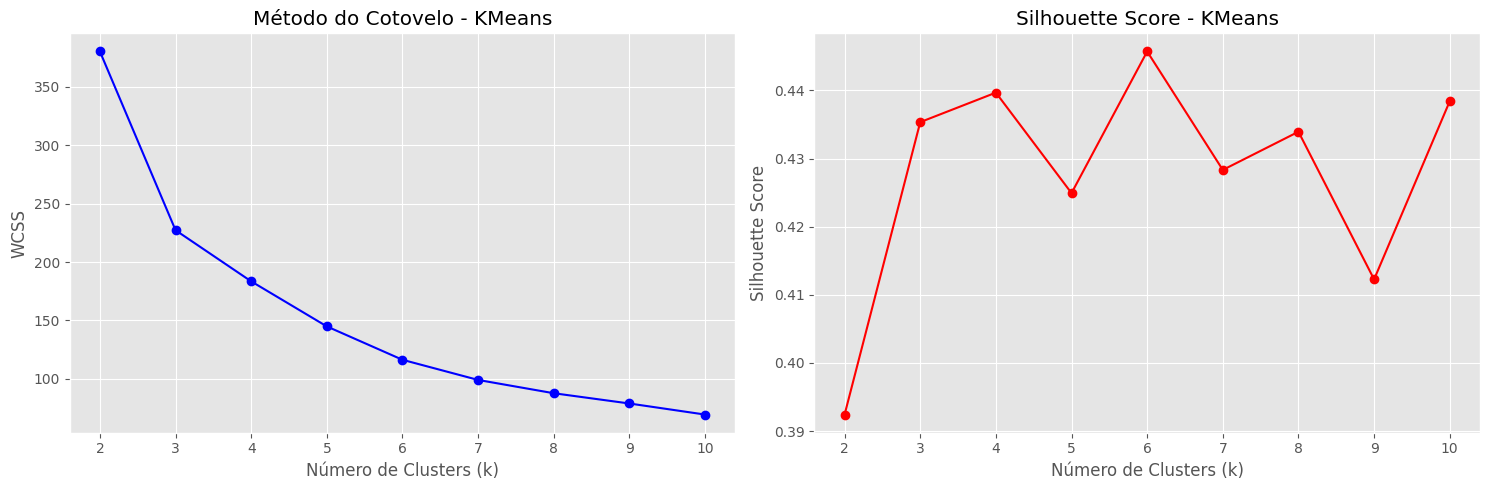

Número ideal de clusters sugerido: 7
Aplicando algoritmo KMeans...
Aplicando algoritmo DBSCAN...
DBSCAN encontrou 3 clusters (+ outliers)
Aplicando Gaussian Mixture Model...
Preparando visualização com PCA...
Variância explicada pelos componentes PCA: 93.44%


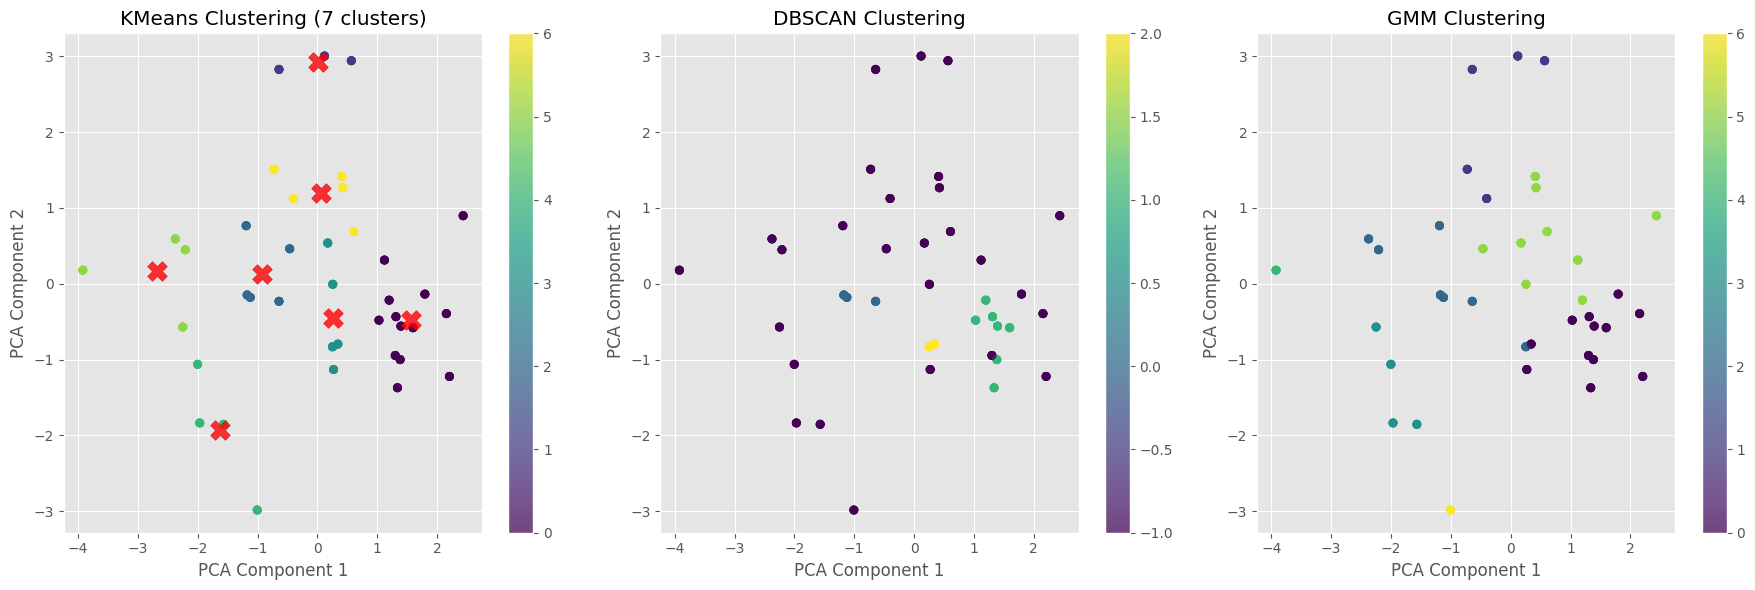

Avaliação da qualidade dos clusters:
KMeans - Silhouette Score: 0.428
KMeans - Calinski-Harabasz Score: 131.461
KMeans - Davies-Bouldin Score: 0.851
Análise do rendimento médio por cluster (KMeans):


Rendimento                 Precipitacao Temperatura  \
                     mean       std count         mean        mean   
Cluster_KMeans                                                       
0                57655.71  72032.76    52      2814.98       26.14   
1                55159.83  70210.14    12      2294.09       26.77   
2                50732.50  64840.55    20      2219.09       26.17   
3                54796.05  70546.01    20      2447.73       26.09   
4                55710.62  73432.76    16      2334.50       25.74   
5                55490.62  72402.65    16      2105.88       26.14   
6                60503.85  77709.13    20      2480.17       26.43   

               Umidade_Relativa Umidade_Especifica  
                           mean               mean  
Cluster_KMeans                                      
0                         85.72              18.38  
1                         83.67              18.60  
2                         84.42              18.11  
3                         85.32              18.23  
4                         84.52              17.68  
5                         82.93              17.75  
6                         84.17              18.35

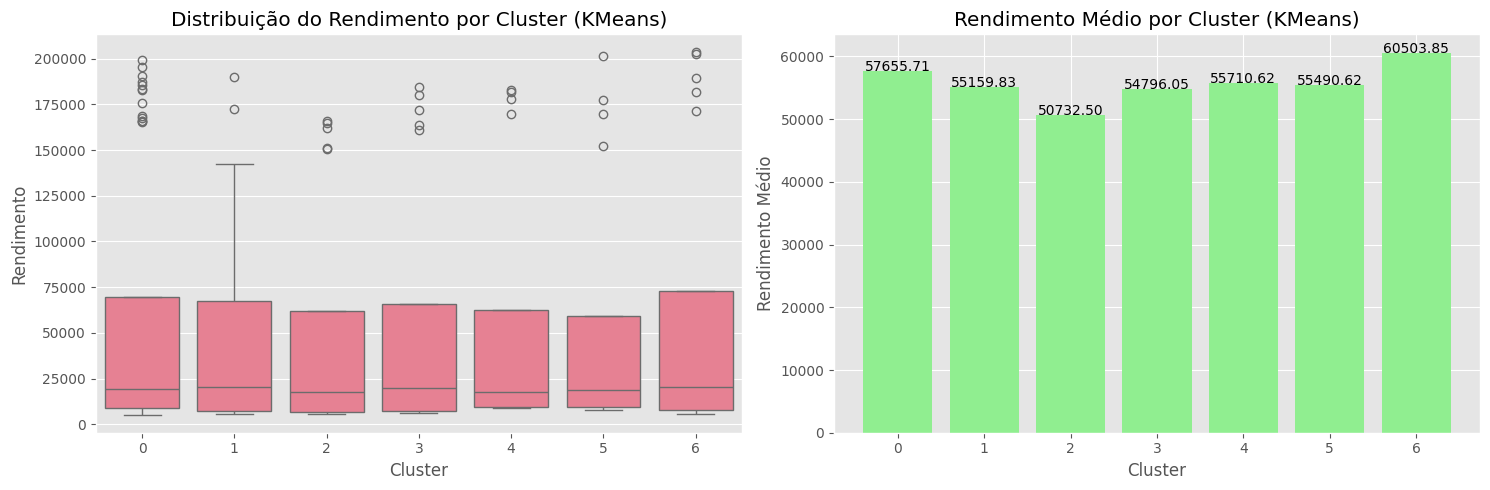

Características médias de cada cluster:


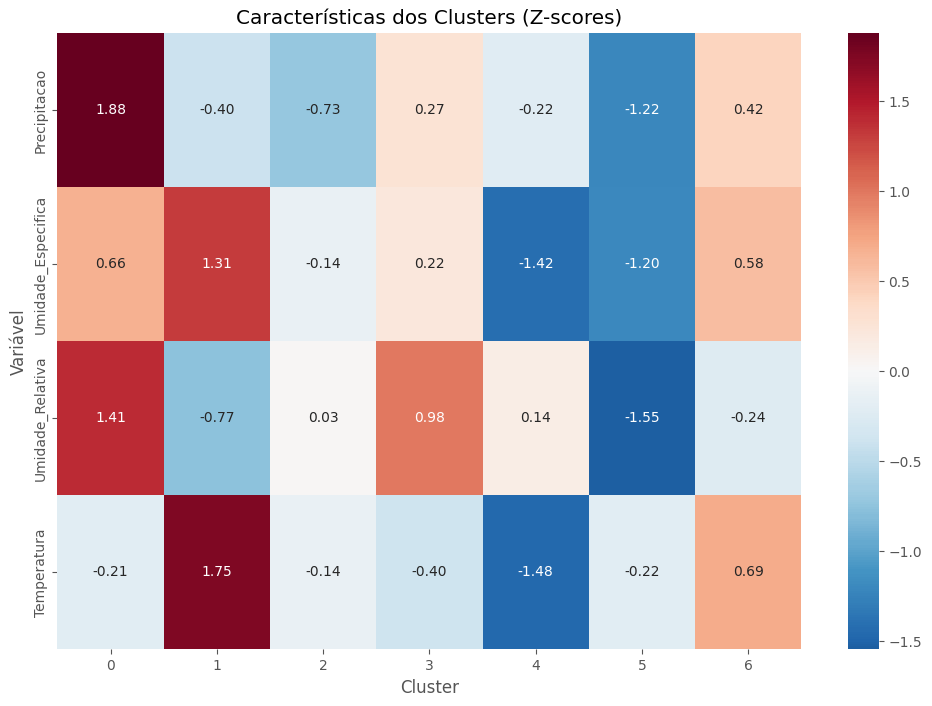

Identificação de tendências de produtividade:
Clusters ordenados por produtividade (rendimento médio):
Cluster_KMeans
6    60503.85
0    57655.71
4    55710.62
5    55490.62
1    55159.83
3    54796.05
2    50732.50
Name: (Rendimento, mean), dtype: float64

Cluster de alta produtividade: 6 (Rendimento médio: 60503.85)
Cluster de baixa produtividade: 2 (Rendimento médio: 50732.50)

Condições médias do cluster de alta produtividade:
Precipitacao          2480.17
Umidade_Especifica      18.35
Umidade_Relativa        84.17
Temperatura             26.43
dtype: float64

Condições médias do cluster de baixa produtividade:
Precipitacao          2219.09
Umidade_Especifica      18.11
Umidade_Relativa        84.42
Temperatura             26.17
dtype: float64
Distribuição de culturas por cluster:


Cluster_KMeans,0,1,2,3,4,5,6
Crop,,,,,,,
"Cocoa, beans",13,3,5,5,4,4,5
Oil palm fruit,13,3,5,5,4,4,5
"Rice, paddy",13,3,5,5,4,4,5
"Rubber, natural",13,3,5,5,4,4,5


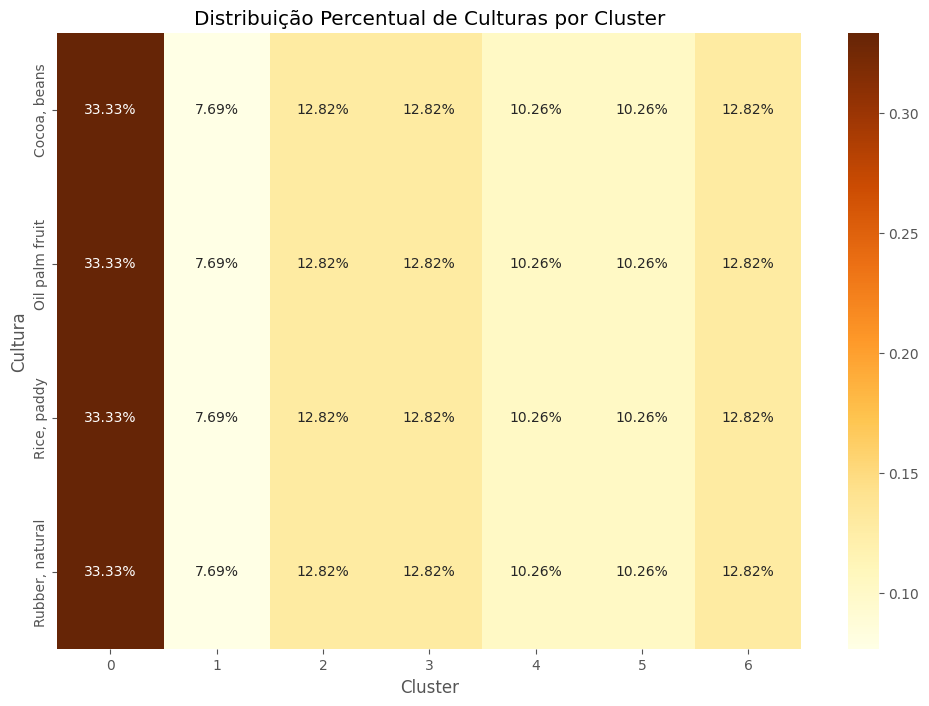

Outliers identificados pela clusterização:
Número de outliers detectados pelo DBSCAN: 108

Características dos outliers:


,Precipitacao,Umidade_Especifica,Umidade_Relativa,Temperatura,Rendimento
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2449.195185,18.186667,84.441481,26.229259,57591.166667
std,315.812423,0.340115,0.987934,0.300304,72207.447818
min,1934.620000,17.540000,82.110000,25.560000,5571.000000
25%,2301.540000,17.810000,83.520000,26.030000,8836.000000
50%,2363.630000,18.270000,84.480000,26.240000,19121.500000
75%,2607.960000,18.430000,85.160000,26.430000,67518.750000
max,3085.790000,18.700000,86.100000,26.810000,203399.000000


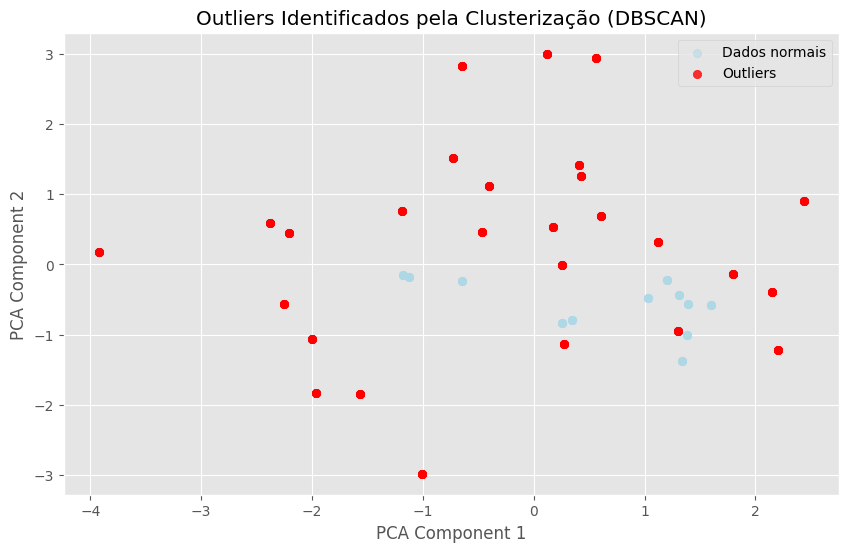

Resultados da clusterização salvos com sucesso!
Insights da clusterização:
- Número ideal de clusters: 7
- Cluster de maior produtividade: 6
- Cluster de menor produtividade: 2
- Qualidade dos clusters (Silhouette): 0.428
Clusterização concluída com sucesso!


In [ ]:
# %% [markdown]
# ## Clusterização para Identificação de Tendências de Produtividade

# %%
# Preparação dos dados para clusterização
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

print("Preparando dados para clusterização...")

# %%
# Selecionar features para clusterização (excluindo a target e colunas categóricas)
features_cluster = [col for col in numeric_cols if col != target_col]
print("Features selecionadas para clusterização:")
print(features_cluster)

# Dados para clusterização
X_cluster = df[features_cluster].copy()

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print(f"Dimensões dos dados para clusterização: {X_scaled.shape}")

# %%
# Análise do número ideal de clusters usando o método do cotovelo
print("Determinando número ideal de clusters...")

wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    if k > 1:  # Silhouette score precisa de pelo menos 2 clusters
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot do método do cotovelo
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo - KMeans')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'ro-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - KMeans')
plt.grid(True)

plt.tight_layout()
plt.show()

# %%
# Escolhendo o número ideal de clusters baseado no silhouette score
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))] + 1
print(f"Número ideal de clusters sugerido: {optimal_k}")

# %%
# Aplicando KMeans com o número ideal de clusters
print("Aplicando algoritmo KMeans...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# %%
# Aplicando DBSCAN para comparação
print("Aplicando algoritmo DBSCAN...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Verificar número de clusters encontrados pelo DBSCAN
n_clusters_dbscan = len(set(df['Cluster_DBSCAN'])) - (1 if -1 in df['Cluster_DBSCAN'].values else 0)
print(f"DBSCAN encontrou {n_clusters_dbscan} clusters (+ outliers)")

# %%
# Aplicando Gaussian Mixture Model
print("Aplicando Gaussian Mixture Model...")
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_scaled)

# %%
# Redução de dimensionalidade com PCA para visualização
print("Preparando visualização com PCA...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

print(f"Variância explicada pelos componentes PCA: {pca.explained_variance_ratio_.sum():.2%}")

# %%
# Visualização dos clusters (KMeans)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster_KMeans'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'KMeans Clustering ({optimal_k} clusters)')

# Adicionar centroides no espaço PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, alpha=0.8)

plt.subplot(1, 3, 2)
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster_DBSCAN'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster_GMM'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering')

plt.tight_layout()
plt.show()

# %%
# Avaliação dos clusters
print("Avaliação da qualidade dos clusters:")

# Métricas para KMeans
silhouette_kmeans = silhouette_score(X_scaled, df['Cluster_KMeans'])
calinski_kmeans = calinski_harabasz_score(X_scaled, df['Cluster_KMeans'])
davies_kmeans = davies_bouldin_score(X_scaled, df['Cluster_KMeans'])

print(f"KMeans - Silhouette Score: {silhouette_kmeans:.3f}")
print(f"KMeans - Calinski-Harabasz Score: {calinski_kmeans:.3f}")
print(f"KMeans - Davies-Bouldin Score: {davies_kmeans:.3f}")

# %%
# Análise dos clusters em relação ao rendimento
print("Análise do rendimento médio por cluster (KMeans):")
cluster_analysis = df.groupby('Cluster_KMeans').agg({
    target_col: ['mean', 'std', 'count'],
    'Precipitacao': 'mean',
    'Temperatura': 'mean',
    'Umidade_Relativa': 'mean',
    'Umidade_Especifica': 'mean'
}).round(2)

display(cluster_analysis)

# %%
# Visualização do rendimento por cluster
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Cluster_KMeans', y=target_col)
plt.title('Distribuição do Rendimento por Cluster (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Rendimento')

plt.subplot(1, 2, 2)
cluster_means = df.groupby('Cluster_KMeans')[target_col].mean()
plt.bar(cluster_means.index, cluster_means.values, color='lightgreen')
plt.title('Rendimento Médio por Cluster (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Rendimento Médio')
for i, v in enumerate(cluster_means.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

# %%
# Análise das características de cada cluster
print("Características médias de cada cluster:")

# Calcular z-scores para interpretação
cluster_characteristics = df.groupby('Cluster_KMeans')[features_cluster].mean()
z_scores = (cluster_characteristics - cluster_characteristics.mean()) / cluster_characteristics.std()

plt.figure(figsize=(12, 8))
sns.heatmap(z_scores.T, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Características dos Clusters (Z-scores)')
plt.xlabel('Cluster')
plt.ylabel('Variável')
plt.show()

# %%
# Identificação de tendências de produtividade
print("Identificação de tendências de produtividade:")

# Ordenar clusters por rendimento médio
productive_clusters = cluster_analysis[(target_col, 'mean')].sort_values(ascending=False)
print("Clusters ordenados por produtividade (rendimento médio):")
print(productive_clusters)

# Identificar clusters de alta e baixa produtividade
high_productivity = productive_clusters.index[0]
low_productivity = productive_clusters.index[-1]

print(f"\nCluster de alta produtividade: {high_productivity} (Rendimento médio: {productive_clusters.iloc[0]:.2f})")
print(f"Cluster de baixa produtividade: {low_productivity} (Rendimento médio: {productive_clusters.iloc[-1]:.2f})")

# %%
# Análise das condições ideais para alta produtividade
print("\nCondições médias do cluster de alta produtividade:")
high_prod_conditions = df[df['Cluster_KMeans'] == high_productivity][features_cluster].mean()
print(high_prod_conditions.round(2))

print("\nCondições médias do cluster de baixa produtividade:")
low_prod_conditions = df[df['Cluster_KMeans'] == low_productivity][features_cluster].mean()
print(low_prod_conditions.round(2))

# %%
# Relação entre clusters e tipos de cultura
print("Distribuição de culturas por cluster:")
culture_cluster_dist = pd.crosstab(df[cultura_col], df['Cluster_KMeans'])
display(culture_cluster_dist)

# Visualização
plt.figure(figsize=(12, 8))
culture_cluster_percent = culture_cluster_dist.div(culture_cluster_dist.sum(axis=1), axis=0)
sns.heatmap(culture_cluster_percent, annot=True, cmap='YlOrBr', fmt='.2%')
plt.title('Distribuição Percentual de Culturas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cultura')
plt.show()

# %%
# Identificação de outliers nos clusters
print("Outliers identificados pela clusterização:")
cluster_outliers = df[df['Cluster_DBSCAN'] == -1]
print(f"Número de outliers detectados pelo DBSCAN: {len(cluster_outliers)}")

if len(cluster_outliers) > 0:
    print("\nCaracterísticas dos outliers:")
    display(cluster_outliers[features_cluster + [target_col, cultura_col]].describe())

    # Visualização dos outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PCA1'], df['PCA2'], c='lightblue', alpha=0.5, label='Dados normais')
    plt.scatter(cluster_outliers['PCA1'], cluster_outliers['PCA2'], c='red', alpha=0.8, label='Outliers')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Outliers Identificados pela Clusterização (DBSCAN)')
    plt.legend()
    plt.show()

# %%
# Salvando resultados da clusterização
df.to_csv(f'{output_dir}/crop_yield_clustered.csv', index=False)

# Salvando insights da clusterização
cluster_insights = {
    'optimal_clusters': optimal_k,
    'high_productivity_cluster': int(high_productivity),
    'low_productivity_cluster': int(low_productivity),
    'high_prod_conditions': high_prod_conditions.to_dict(),
    'low_prod_conditions': low_prod_conditions.to_dict(),
    'cluster_metrics': {
        'silhouette_score': float(silhouette_kmeans),
        'calinski_harabasz_score': float(calinski_kmeans),
        'davies_bouldin_score': float(davies_kmeans)
    }
}

print("Resultados da clusterização salvos com sucesso!")
print("Insights da clusterização:")
print(f"- Número ideal de clusters: {optimal_k}")
print(f"- Cluster de maior produtividade: {high_productivity}")
print(f"- Cluster de menor produtividade: {low_productivity}")
print(f"- Qualidade dos clusters (Silhouette): {silhouette_kmeans:.3f}")

# %%
print("Clusterização concluída com sucesso!")

Preparando dados para modelagem...
Features selecionadas: ['Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura', 'Crop_encoded']
Target: Rendimento
Dimensões: X=(156, 5), y=(156,)
Dados de treino: 124 amostras
Dados de teste: 32 amostras
Dados padronizados com sucesso!
1. Treinando Regressão Linear...

Linear Regression Results:
   MAE  - Treino: 57733.8074, Teste: 53724.4851
   RMSE - Treino: 69257.5553, Teste: 65364.5690
   R²   - Treino: 0.0728, Teste: -0.1015
   CV R²: -0.0277

Coeficientes da Regressão Linear:
   Precipitacao: 5085.8893
   Umidade_Especifica: 173122.0374
   Umidade_Relativa: -129665.2498
   Temperatura: -165471.8935
   Crop_encoded: -16676.5130
   Intercept: 83683.8664
2. Treinando Random Forest...

Random Forest Results:
   MAE  - Treino: 1670.0316, Teste: 2743.5047
   RMSE - Treino: 3007.7102, Teste: 4625.2836
   R²   - Treino: 0.9983, Teste: 0.9945
   CV R²: 0.9847

Importância das Features (Random Forest):
              feature  importance
4

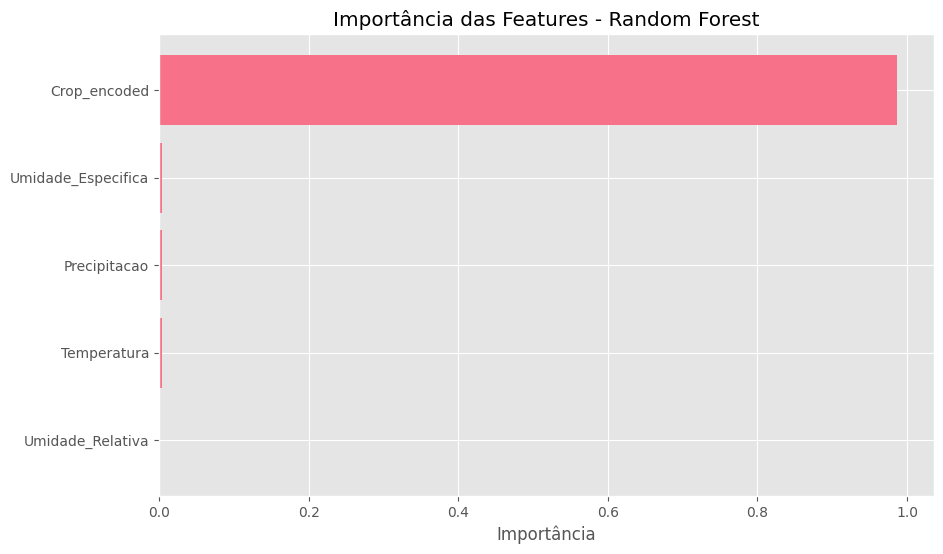

3. Treinando XGBoost...

XGBoost Results:
   MAE  - Treino: 333.1242, Teste: 3271.9587
   RMSE - Treino: 480.5818, Teste: 5585.0962
   R²   - Treino: 1.0000, Teste: 0.9920
   CV R²: 0.9793
4. Treinando SVR...

SVR Results:
   MAE  - Treino: 50079.9735, Teste: 38973.0710
   RMSE - Treino: 85211.3200, Teste: 71312.5782
   R²   - Treino: -0.4035, Teste: -0.3110
   CV R²: -0.3687
5. Treinando MLP Regressor...

MLP Results:
   MAE  - Treino: 54845.2055, Teste: 42674.5984
   RMSE - Treino: 78425.9610, Teste: 67579.9764
   R²   - Treino: -0.1889, Teste: -0.1774
   CV R²: -0.2504
COMPARAÇÃO DE TODOS OS MODELOS:


,Modelo,MAE_Treino,MAE_Teste,RMSE_Treino,RMSE_Teste,R2_Treino,R2_Teste,CV_R2
1,Random Forest,1670.0316,2743.5047,3007.7102,4625.2836,0.9983,0.9945,0.9847
2,XGBoost,333.1242,3271.9587,480.5818,5585.0962,1.0000,0.9920,0.9793
0,Linear Regression,57733.8074,53724.4851,69257.5553,65364.5690,0.0728,-0.1015,-0.0277
4,MLP,54845.2055,42674.5984,78425.9610,67579.9764,-0.1889,-0.1774,-0.2504
3,SVR,50079.9735,38973.0710,85211.3200,71312.5782,-0.4035,-0.3110,-0.3687


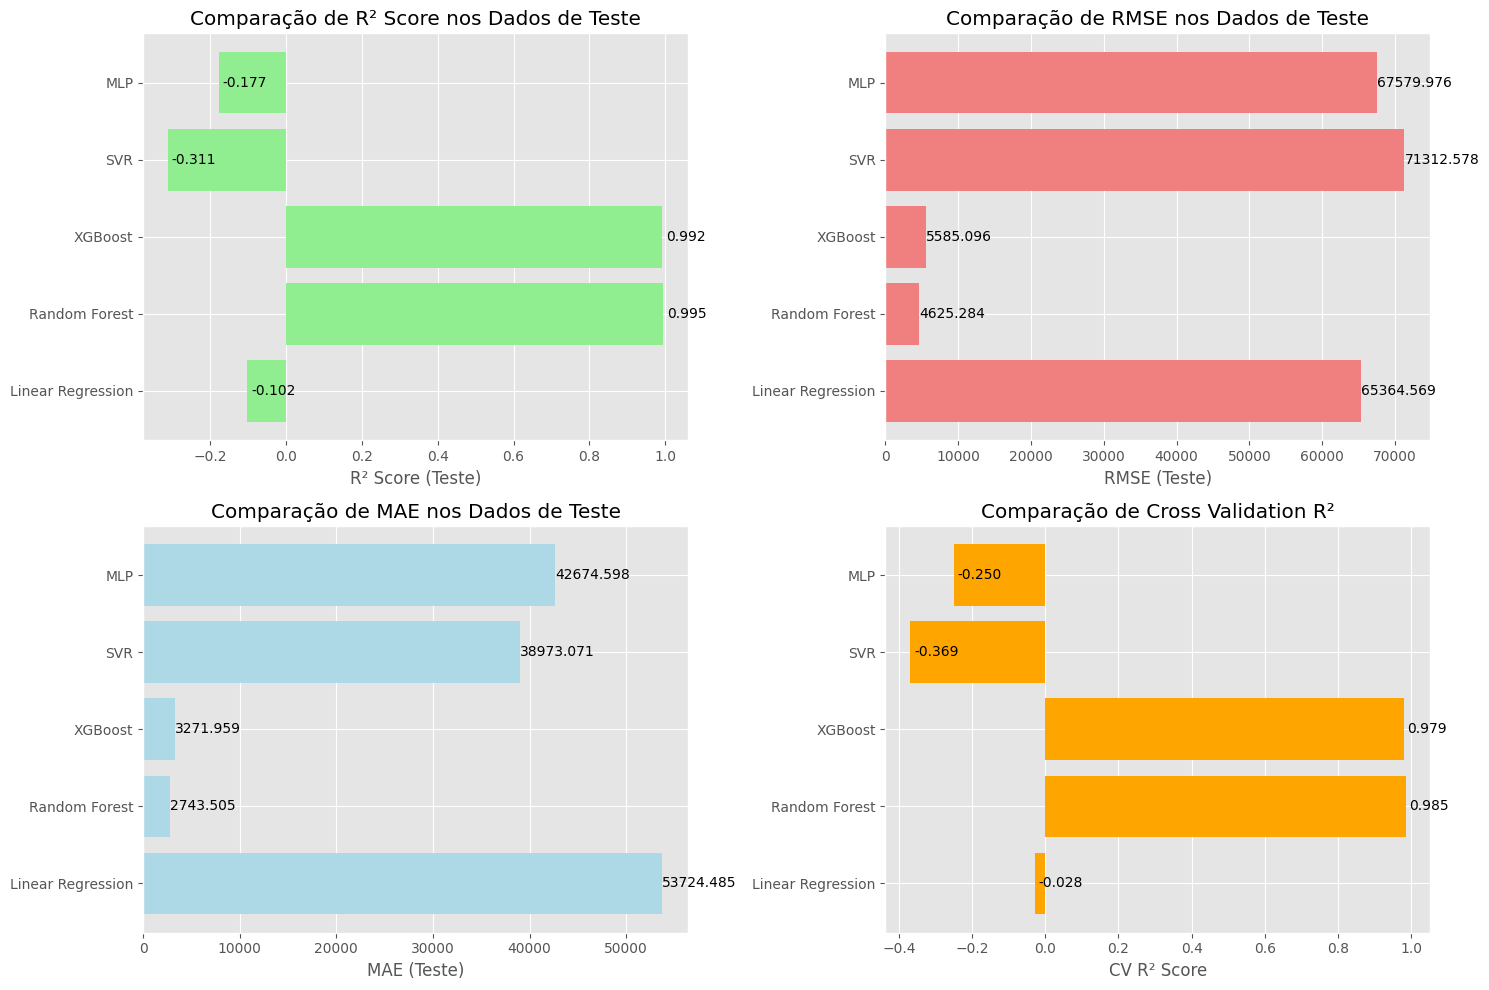

Melhor modelo: Random Forest


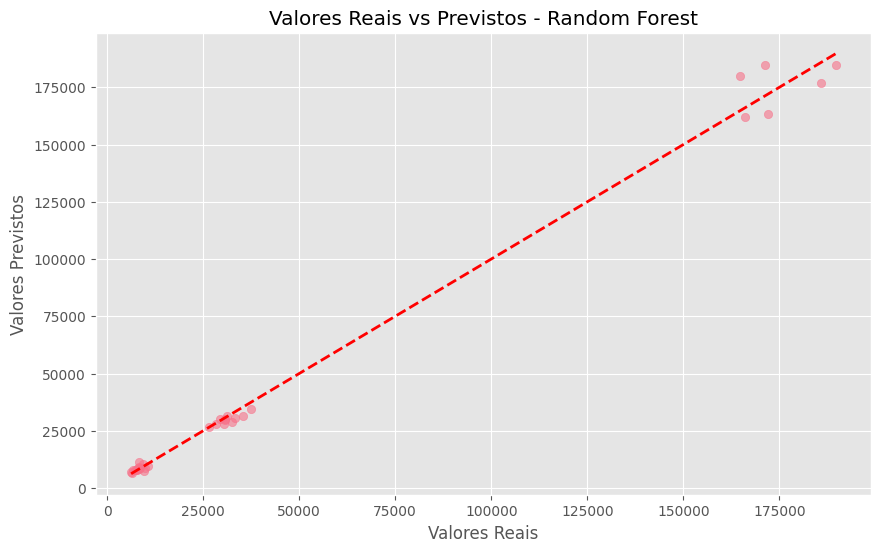

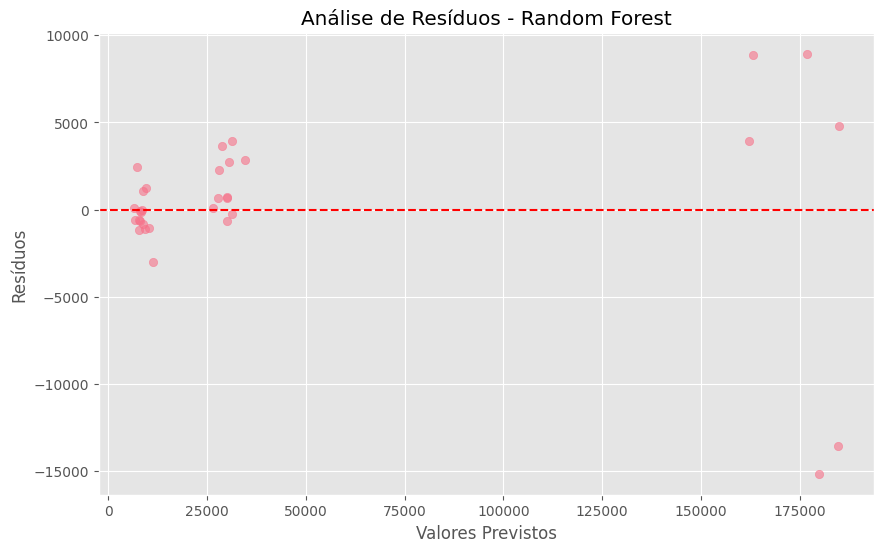

Feature Importance do Melhor Modelo:
              feature  importance
4        Crop_encoded    0.986720
1  Umidade_Especifica    0.004480
0        Precipitacao    0.003578
3         Temperatura    0.003384
2    Umidade_Relativa    0.001838


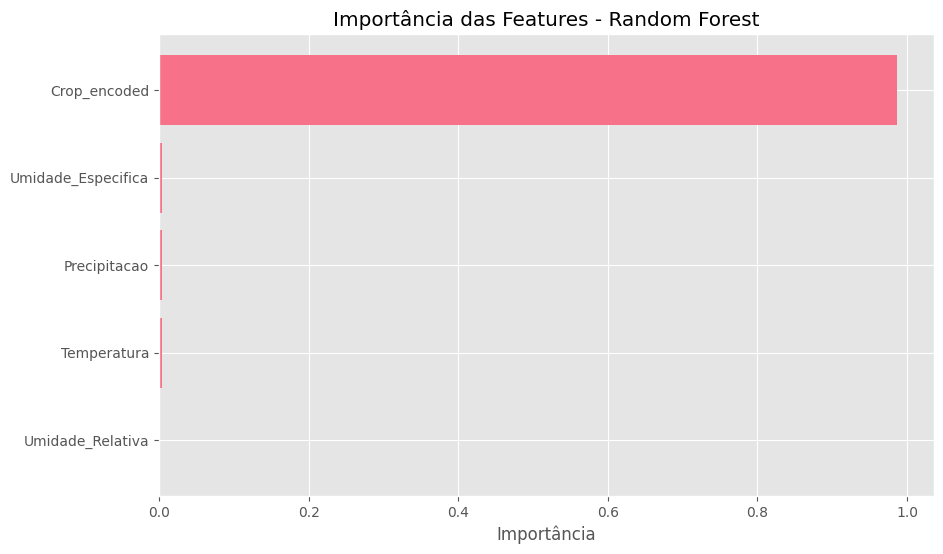

Validação Cruzada Detalhada - Random Forest:
Scores de cada fold: [0.9667592  0.98726453 0.98145564 0.99134486 0.99687454]
Média R²: 0.9847 (±0.0103)
Modelos e resultados salvos com sucesso!
RELATÓRIO FINAL DE PERFORMANCE DOS MODELOS
Melhor modelo: Random Forest
R² no teste: 0.9945
RMSE no teste: 4625.2836
MAE no teste: 2743.5047
Exemplo de previsão:
Amostra 1:
  Real: 29415.00
  Previsto: 30077.95
  Erro: 662.95

Amostra 2:
  Real: 185831.00
  Previsto: 176889.85
  Erro: 8941.15

Amostra 3:
  Real: 26648.00
  Previsto: 26564.04
  Erro: 83.96

Modelagem preditiva concluída com sucesso
Todos os 5 modelos foram treinados e avaliados


In [ ]:
# %% [markdown]
# ## Modelos Preditivos de Regressão

# %%
# Preparação dos dados para modelagem
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

print("Preparando dados para modelagem...")

# %%
# Preparar features e target
# Usar todas as features numéricas exceto as criadas durante a análise
base_features = ['Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura']

# Codificar a variável categórica 'Crop'
label_encoder = LabelEncoder()
df['Crop_encoded'] = label_encoder.fit_transform(df['Crop'])

# Features finais para o modelo
features = base_features + ['Crop_encoded']
X = df[features]
y = df[target_col]

print(f"Features selecionadas: {features}")
print(f"Target: {target_col}")
print(f"Dimensões: X={X.shape}, y={y.shape}")

# %%
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Dados de treino: {X_train.shape[0]} amostras")
print(f"Dados de teste: {X_test.shape[0]} amostras")

# %%
# Padronizar as features numéricas (exceto a variável codificada)
scaler = StandardScaler()
numeric_features = base_features  # Apenas as features numéricas originais

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print("Dados padronizados com sucesso!")

# %%
# Dicionário para armazenar os resultados dos modelos
model_results = {}

# Função para avaliar e armazenar resultados dos modelos
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular métricas
    metrics = {
        'model': model,
        'train_mae': mean_absolute_error(y_train, y_pred_train),
        'test_mae': mean_absolute_error(y_test, y_pred_test),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'cv_score': cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    }

    model_results[model_name] = metrics
    return metrics

# Função para imprimir resultados
def print_model_results(metrics, model_name):
    print(f"\n{model_name} Results:")
    print(f"   MAE  - Treino: {metrics['train_mae']:.4f}, Teste: {metrics['test_mae']:.4f}")
    print(f"   RMSE - Treino: {metrics['train_rmse']:.4f}, Teste: {metrics['test_rmse']:.4f}")
    print(f"   R²   - Treino: {metrics['train_r2']:.4f}, Teste: {metrics['test_r2']:.4f}")
    print(f"   CV R²: {metrics['cv_score']:.4f}")

# %% [markdown]
# ## 1. Regressão Linear

# %%
print("1. Treinando Regressão Linear...")
lr_model = LinearRegression()
lr_metrics = evaluate_model(lr_model, "Linear Regression", X_train_scaled, X_test_scaled, y_train, y_test)
print_model_results(lr_metrics, "Linear Regression")

# %%
# Coeficientes da regressão linear
print("\nCoeficientes da Regressão Linear:")
for feature, coef in zip(features, lr_model.coef_):
    print(f"   {feature}: {coef:.4f}")
print(f"   Intercept: {lr_model.intercept_:.4f}")

# %% [markdown]
# ## 2. Random Forest Regressor

# %%
print("2. Treinando Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_metrics = evaluate_model(rf_model, "Random Forest", X_train_scaled, X_test_scaled, y_train, y_test)
print_model_results(rf_metrics, "Random Forest")

# %%
# Importância das features no Random Forest
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportância das Features (Random Forest):")
print(feature_importance)

# Visualizar importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importância')
plt.title('Importância das Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# %% [markdown]
# ## 3. Gradient Boosting Regressor (XGBoost)

# %%
print("3. Treinando XGBoost...")
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_metrics = evaluate_model(xgb_model, "XGBoost", X_train_scaled, X_test_scaled, y_train, y_test)
print_model_results(xgb_metrics, "XGBoost")

# %% [markdown]
# ## 4. Support Vector Regression (SVR)

# %%
print("4. Treinando SVR...")
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_metrics = evaluate_model(svr_model, "SVR", X_train_scaled, X_test_scaled, y_train, y_test)
print_model_results(svr_metrics, "SVR")

# %% [markdown]
# ## 5. Multi-layer Perceptron (MLP) Regressor

# %%
print("5. Treinando MLP Regressor...")
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=1000
)
mlp_metrics = evaluate_model(mlp_model, "MLP", X_train_scaled, X_test_scaled, y_train, y_test)
print_model_results(mlp_metrics, "MLP")

# %%
# Comparação de todos os modelos
print("COMPARAÇÃO DE TODOS OS MODELOS:")
comparison_df = pd.DataFrame({
    'Modelo': list(model_results.keys()),
    'MAE_Treino': [results['train_mae'] for results in model_results.values()],
    'MAE_Teste': [results['test_mae'] for results in model_results.values()],
    'RMSE_Treino': [results['train_rmse'] for results in model_results.values()],
    'RMSE_Teste': [results['test_rmse'] for results in model_results.values()],
    'R2_Treino': [results['train_r2'] for results in model_results.values()],
    'R2_Teste': [results['test_r2'] for results in model_results.values()],
    'CV_R2': [results['cv_score'] for results in model_results.values()]
}).round(4)

display(comparison_df.sort_values('R2_Teste', ascending=False))

# %%
# Visualização comparativa dos modelos
plt.figure(figsize=(15, 10))

# R² Score
plt.subplot(2, 2, 1)
models = comparison_df['Modelo']
r2_test = comparison_df['R2_Teste']
plt.barh(models, r2_test, color='lightgreen')
plt.xlabel('R² Score (Teste)')
plt.title('Comparação de R² Score nos Dados de Teste')
for i, v in enumerate(r2_test):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

# RMSE
plt.subplot(2, 2, 2)
rmse_test = comparison_df['RMSE_Teste']
plt.barh(models, rmse_test, color='lightcoral')
plt.xlabel('RMSE (Teste)')
plt.title('Comparação de RMSE nos Dados de Teste')
for i, v in enumerate(rmse_test):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

# MAE
plt.subplot(2, 2, 3)
mae_test = comparison_df['MAE_Teste']
plt.barh(models, mae_test, color='lightblue')
plt.xlabel('MAE (Teste)')
plt.title('Comparação de MAE nos Dados de Teste')
for i, v in enumerate(mae_test):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

# Cross Validation Score
plt.subplot(2, 2, 4)
cv_r2 = comparison_df['CV_R2']
plt.barh(models, cv_r2, color='orange')
plt.xlabel('CV R² Score')
plt.title('Comparação de Cross Validation R²')
for i, v in enumerate(cv_r2):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# %%
# Análise das previsões vs valores reais para o melhor modelo
best_model_name = comparison_df.loc[comparison_df['R2_Teste'].idxmax(), 'Modelo']
best_model = model_results[best_model_name]['model']

print(f"Melhor modelo: {best_model_name}")

# Previsões do melhor modelo
y_pred_best = best_model.predict(X_test_scaled)

# Gráfico de dispersão: Valores Reais vs Previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title(f'Valores Reais vs Previstos - {best_model_name}')
plt.show()

# Distribuição dos resíduos
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title(f'Análise de Resíduos - {best_model_name}')
plt.show()

# %%
# Feature Importance do melhor modelo
if hasattr(best_model, 'feature_importances_'):
    best_feature_importance = pd.DataFrame({
        'feature': features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Feature Importance do Melhor Modelo:")
    print(best_feature_importance)

    plt.figure(figsize=(10, 6))
    plt.barh(best_feature_importance['feature'], best_feature_importance['importance'])
    plt.xlabel('Importância')
    plt.title(f'Importância das Features - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.show()

# %%
# Validação cruzada mais detalhada para o melhor modelo
print(f"Validação Cruzada Detalhada - {best_model_name}:")
cv_scores = cross_val_score(best_model, X_train_scaled, y_train,
                           cv=5, scoring='r2')
print(f"Scores de cada fold: {cv_scores}")
print(f"Média R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# %%
# Salvando os resultados dos modelos
import joblib
import json

# Criar diretório para salvar modelos
model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Salvar os modelos
for model_name, results in model_results.items():
    joblib.dump(results['model'], f'{model_dir}/{model_name.replace(" ", "_").lower()}.pkl')

# Salvar o scaler e label encoder
joblib.dump(scaler, f'{model_dir}/scaler.pkl')
joblib.dump(label_encoder, f'{model_dir}/label_encoder.pkl')

# Salvar resultados em JSON
with open(f'{model_dir}/model_results.json', 'w') as f:
    json.dump({
        'comparison': comparison_df.to_dict(),
        'best_model': best_model_name,
        'features': features,
        'target': target_col
    }, f, indent=2)

print("Modelos e resultados salvos com sucesso!")

# %%
# Relatório final de performance
print("RELATÓRIO FINAL DE PERFORMANCE DOS MODELOS")
print("=" * 50)
print(f"Melhor modelo: {best_model_name}")
print(f"R² no teste: {comparison_df.loc[comparison_df['Modelo'] == best_model_name, 'R2_Teste'].values[0]:.4f}")
print(f"RMSE no teste: {comparison_df.loc[comparison_df['Modelo'] == best_model_name, 'RMSE_Teste'].values[0]:.4f}")
print(f"MAE no teste: {comparison_df.loc[comparison_df['Modelo'] == best_model_name, 'MAE_Teste'].values[0]:.4f}")

# %%
# Exemplo de previsão com o melhor modelo
print("Exemplo de previsão:")
sample_data = X_test_scaled.iloc[:3].copy()
sample_actual = y_test.iloc[:3].values
sample_pred = best_model.predict(sample_data)

for i in range(3):
    print(f"Amostra {i+1}:")
    print(f"  Real: {sample_actual[i]:.2f}")
    print(f"  Previsto: {sample_pred[i]:.2f}")
    print(f"  Erro: {abs(sample_actual[i] - sample_pred[i]):.2f}")
    print()

# %%
print("Modelagem preditiva concluída com sucesso")
print("Todos os 5 modelos foram treinados e avaliados")

# Relatório Detalhado do Projeto FarmTech Solutions

## Introdução

Este relatório apresenta os resultados da análise e modelagem de dados agrícolas com o objetivo de prever o rendimento de diferentes culturas. O projeto passou pelas fases de instalação de bibliotecas, carregamento e visualização inicial dos dados, análise exploratória detalhada, clusterização para identificar tendências de produtividade e modelagem preditiva utilizando diversos algoritmos de regressão.

## Análise Exploratória de Dados

A análise exploratória revelou as seguintes características do dataset:

*   **Dimensões:** O dataset contém 156 amostras e 6 colunas, incluindo informações sobre a cultura, precipitação, umidade específica, umidade relativa, temperatura e rendimento.
*   **Variáveis:** As variáveis incluem uma variável categórica ('Crop') e cinco variáveis numéricas.
*   **Valores Ausentes e Duplicados:** Não foram encontrados valores ausentes ou duplicados no dataset original.
*   **Distribuição das Culturas:** O dataset possui uma distribuição equitativa entre as quatro culturas presentes: Cocoa, beans, Oil palm fruit, Rice, paddy e Rubber, natural, cada uma representando 25% das amostras.
*   **Estatísticas Descritivas:** As estatísticas descritivas das variáveis numéricas mostram a faixa de valores para cada uma delas. A variável de rendimento ('Yield') apresenta uma grande variação, indicando diferentes níveis de produtividade entre as culturas.
*   **Correlação:** A matriz de correlação indicou baixas correlações lineares entre as variáveis ambientais (precipitação, umidade, temperatura) e o rendimento. A variável de cultura ('Crop') parece ser o fator mais influente no rendimento, como observado nos gráficos de dispersão e boxplots por cultura.
*   **Outliers:** A análise de outliers utilizando o método do IQR e Isolation Forest identificou alguns pontos que se destacam, principalmente na variável 'Temperatura' e na distribuição geral dos dados.

## Clusterização

A clusterização foi realizada para identificar grupos de amostras com características ambientais e de rendimento semelhantes.

*   **Método:** Foram utilizados KMeans, DBSCAN e Gaussian Mixture Model nos dados padronizados.
*   **Número de Clusters (KMeans):** O método do cotovelo e o Silhouette Score sugeriram um número ideal de 7 clusters para o KMeans.
*   **Visualização:** A visualização com PCA mostrou a separação dos dados nos clusters identificados pelo KMeans e GMM, enquanto o DBSCAN identificou um grande número de outliers.
*   **Análise por Cluster:** A análise do rendimento médio por cluster (KMeans) revelou diferenças significativas na produtividade entre os grupos. O Cluster 6 apresentou o maior rendimento médio, enquanto o Cluster 2 apresentou o menor.
*   **Características dos Clusters:** A análise das características médias de cada cluster (utilizando z-scores) permitiu identificar as condições ambientais predominantes em cada grupo. O cluster de alta produtividade (Cluster 6) tendeu a ter características distintas em comparação com o cluster de baixa produtividade (Cluster 2).
*   **Relação Cultura-Cluster:** A análise da distribuição de culturas por cluster mostrou que cada cultura está presente em todos os clusters, mas com diferentes proporções em cada um, reforçando a ideia de que as condições ambientais e de produtividade variam independentemente da cultura em si.

## Modelagem Preditiva de Regressão

Diversos modelos de regressão foram treinados e avaliados para prever o rendimento agrícola.

*   **Modelos Avaliados:** Regressão Linear, Random Forest, XGBoost, SVR e MLP Regressor.
*   **Features:** As features utilizadas incluíram as variáveis ambientais numéricas e a variável de cultura codificada ('Crop_encoded').
*   **Avaliação:** Os modelos foram avaliados utilizando MAE, RMSE, R² e validação cruzada (CV R²).
*   **Resultados:** O modelo **Random Forest** apresentou o melhor desempenho nos dados de teste, com um R² de 0.9945, indicando que ele explica quase toda a variância no rendimento. O modelo XGBoost também apresentou um desempenho muito bom. A Regressão Linear, SVR e MLP Regressor tiveram desempenhos significativamente inferiores.
*   **Importância das Features:** No modelo Random Forest, a variável 'Crop_encoded' (a cultura) foi de longe a feature mais importante para a previsão do rendimento, o que corrobora os achados da análise exploratória. As variáveis ambientais tiveram uma importância muito menor na previsão.
*   **Análise de Resíduos:** A análise de resíduos para o melhor modelo (Random Forest) mostrou que as previsões estão bem alinhadas com os valores reais, com os resíduos distribuídos aleatoriamente em torno de zero, indicando um bom ajuste do modelo.

## Conclusões

O projeto FarmTech Solutions demonstrou ser capaz de prever o rendimento agrícola com alta acurácia, principalmente devido à forte influência da variável 'Cultura' nos dados fornecidos.

**Pontos Fortes:**

*   O modelo Random Forest obteve um desempenho excepcional na previsão do rendimento, com um R² muito alto.
*   A análise exploratória e a clusterização forneceram insights valiosos sobre a distribuição dos dados, a relação entre variáveis e a identificação de grupos com diferentes níveis de produtividade.
*   O notebook está bem organizado em seções, facilitando a compreensão do fluxo de trabalho.

**Limitações:**

*   A baixa correlação entre as variáveis ambientais e o rendimento sugere que, neste dataset específico, as condições ambientais fornecidas não são os principais fatores determinantes do rendimento, sendo a cultura o fator dominante. Isso pode limitar a generalização do modelo para cenários onde as variações ambientais têm maior impacto.
*   O dataset é relativamente pequeno (156 amostras), o que pode impactar a robustez dos modelos e a detecção de padrões mais sutis.
*   A análise de outliers pelo DBSCAN identificou um grande número de pontos como outliers, o que pode indicar que a estrutura dos dados não se ajusta bem aos parâmetros padrão do DBSCAN ou que há uma alta variabilidade nos dados que o DBSCAN interpreta como ruído.

## Próximos Passos

Para aprimorar o projeto, sugere-se:

*   Coletar um dataset maior e com maior variabilidade nas condições ambientais e tipos de cultura.
*   Explorar a engenharia de features para criar novas variáveis que possam capturar interações entre as variáveis ambientais e a cultura.
*   Realizar uma análise mais aprofundada dos outliers identificados, investigando as causas e o impacto na modelagem.
*   Considerar modelos mais complexos ou específicos para dados agrícolas que possam capturar melhor as relações não lineares e as interações entre as variáveis ambientais.